In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
# ^^^ pyforest auto-imports - don't write above this line


In [2]:
df = pd.read_csv('transactions_dataset.csv', sep=";")


In [3]:
df.head()

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id
0,2017-09-25,2017-09-25,2376333,188502,155.44320,3,online,2732
1,2017-09-25,2017-09-25,2520527,835089,16.39440,3,at the store,10279
2,2017-09-25,2017-09-25,2536756,1977896,365.76624,21,online,6184
3,2017-09-25,2017-09-25,3028673,598816,8.59878,201,at the store,4200
4,2017-09-25,2017-09-25,203377,2086861,1093.37400,3,by phone,7051


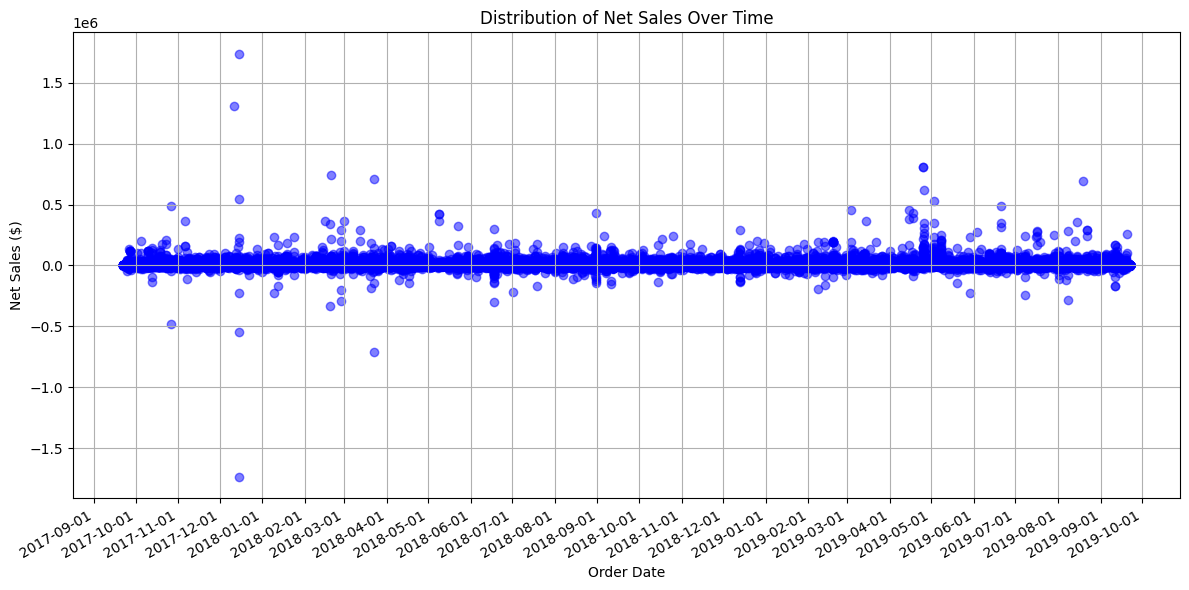

In [7]:
import matplotlib.dates as mdates

df['date_order'] = pd.to_datetime(df['date_order'])

# Sort the DataFrame by the 'date_order' column
df.sort_values('date_order', inplace=True)

# Plotting
plt.figure(figsize=(12, 6))

# Use a scatter plot for clarity
plt.scatter(df['date_order'], df['sales_net'], color='blue', alpha=0.5)  # alpha for transparency

# Formatting the date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Adjust date format as needed
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Adjust interval as needed
plt.gcf().autofmt_xdate()  # Auto-format the dates to avoid overlap

plt.title('Distribution of Net Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Net Sales ($)')
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()


In [38]:
df['date_order'] = pd.to_datetime(df['date_order'])
df['date_invoice'] = pd.to_datetime(df['date_invoice'])

# Calculate the difference (spread) in days between the dates
df['date_spread'] = (df['date_invoice'] - df['date_order']).dt.days

# Filter out the rows where date_order is equal to date_invoice
df_filtered = df[df['date_order'] != df['date_invoice']]

# Check the DataFrame to see the new column and the filtered data
df_filtered

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id,date_spread
39,2017-09-25,2017-09-26,320804,2243299,269.88108,61,by phone,1102,1.0
42,2017-09-25,2017-09-26,1988344,65987,448.38960,3,by phone,10936,1.0
55,2017-09-26,2017-09-27,1072461,1027749,146.51000,7,by phone,9162,1.0
63,2017-09-28,2017-09-29,359491,1070426,14.04840,3,by phone,2929,1.0
64,2017-09-27,2017-09-29,1201024,511577,6.80800,37,by phone,3550,2.0
...,...,...,...,...,...,...,...,...,...
63319310,2019-06-10,2020-06-12,1596284,245272,-2056.91300,5,by phone,7682,368.0
63319311,2018-12-14,2020-07-15,908253,880496,27.62760,1001,by phone,9375,579.0
63319312,2019-07-26,2020-10-29,1168247,2063314,-204.60984,101,by phone,3014,461.0
63319313,2018-05-23,2020-11-27,2319965,1287654,70.49730,17,by phone,1015,919.0


In [39]:
import pandas as pd

df['date_order'] = pd.to_datetime(df['date_order'])
df['date_invoice'] = pd.to_datetime(df['date_invoice'])

# Identify the most recent date in our DataFrame
most_recent_date = df['date_order'].max()

# Filter for the last 12 months for the original DataFrame
start_date = most_recent_date - pd.DateOffset(months=12)
df = df[df['date_order'] >= start_date]

# Calculate the difference (spread) in days between the dates for the last 12 months data
df['date_spread'] = (df['date_invoice'] - df['date_order']).dt.days

# Now create a filtered DataFrame from the last 12 months data,
# excluding rows where date_order is equal to date_invoice
df_filtered = df_last_12_months[df_last_12_months['date_order'] != df_last_12_months['date_invoice']]



<ipython-input-40-cc1b48d5d352>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['month'] = df_filtered['date_order'].dt.to_period("M")


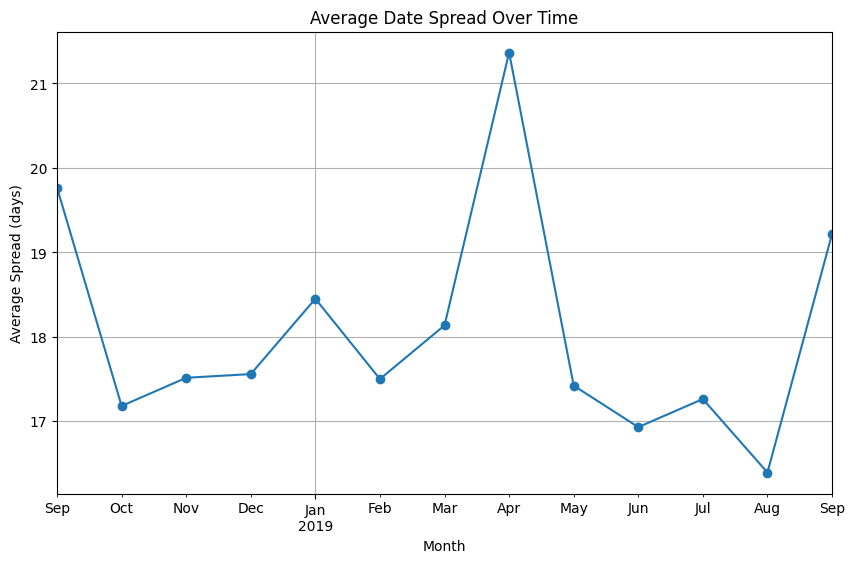

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Grouping by month and calculating average spread
df_filtered['month'] = df_filtered['date_order'].dt.to_period("M")
monthly_spread = df_filtered.groupby('month')['date_spread'].mean()

# Convert the period index back to datetime
monthly_spread.index = monthly_spread.index.to_timestamp()

# Plotting the simulated average date spread over time
plt.figure(figsize=(10, 6))
monthly_spread.plot(marker='o', linestyle='-')
plt.title('Average Date Spread Over Time')
plt.xlabel('Month')
plt.ylabel('Average Spread (days)')
plt.grid(True)
plt.show()


count    9.157004e+06
mean     1.784319e+01
std      3.441913e+01
min     -3.160000e+02
25%      2.000000e+00
50%      7.000000e+00
75%      1.800000e+01
max      9.530000e+02
Name: date_spread, dtype: float64
0.10     1.0
0.25     2.0
0.50     7.0
0.75    18.0
0.90    43.0
Name: date_spread, dtype: float64


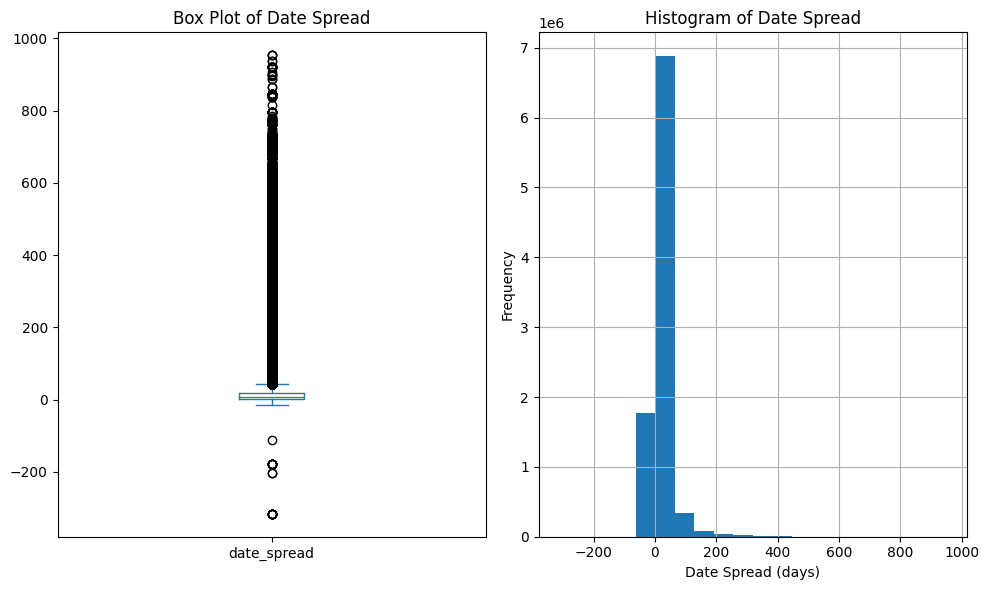

In [41]:
# Statistical summary of the date spreads
stat_summary = df_filtered['date_spread'].describe()
print(stat_summary)

# Calculating specific quantiles
quantiles = df_filtered['date_spread'].quantile([0.1, 0.25, 0.5, 0.75, 0.9])
print(quantiles)

plt.figure(figsize=(10, 6))

# Creating a boxplot
plt.subplot(1, 2, 1)
df_filtered['date_spread'].plot(kind='box')
plt.title('Box Plot of Date Spread')

# Creating a histogram
plt.subplot(1, 2, 2)
df_filtered['date_spread'].hist(bins=20)
plt.title('Histogram of Date Spread')
plt.xlabel('Date Spread (days)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


0.60     10.0
0.70     15.0
0.80     23.0
0.90     43.0
0.95     69.0
0.99    172.0
Name: date_spread, dtype: float64


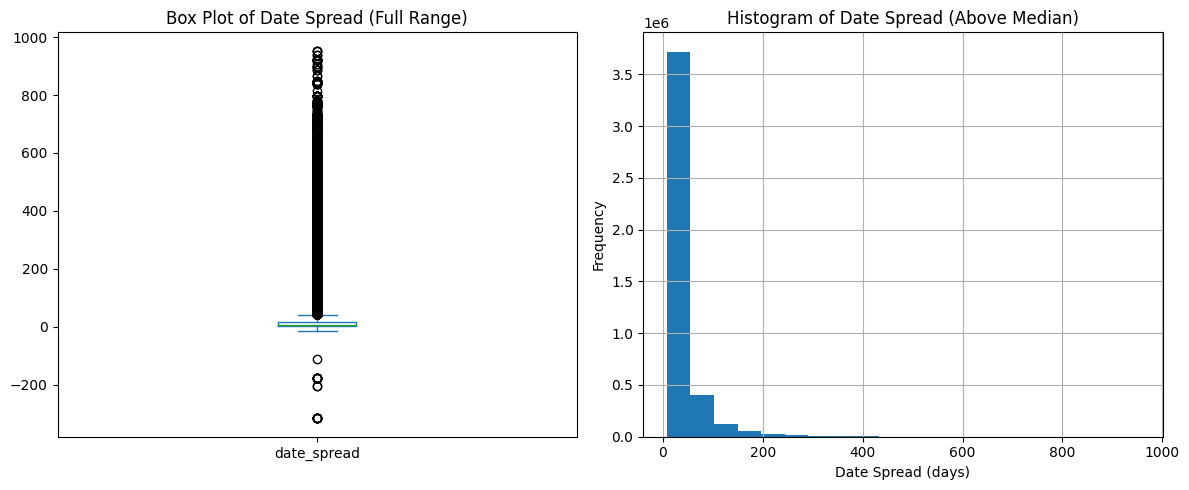

In [42]:
# Calculating higher quantiles for the date_spread
higher_quantiles = df_filtered['date_spread'].quantile([0.6, 0.7, 0.8, 0.9, 0.95, 0.99])
print(higher_quantiles)

# Visualizing the higher quantiles with a boxplot and histogram focusing on the upper distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Boxplot for the date spreads
plt.subplot(1, 2, 1)
df_filtered['date_spread'].plot(kind='box', showfliers=True)  # showfliers=True to show outliers
plt.title('Box Plot of Date Spread (Full Range)')

# Histogram for the date spreads focusing on the upper half
plt.subplot(1, 2, 2)
df_filtered[df_filtered['date_spread'] > df_filtered['date_spread'].median()]['date_spread'].hist(bins=20)
plt.title('Histogram of Date Spread (Above Median)')
plt.xlabel('Date Spread (days)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [43]:
quantiles = df_filtered['date_spread'].quantile([0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1.0])
print(quantiles)


0.50      7.0
0.60     10.0
0.70     15.0
0.80     23.0
0.90     43.0
0.95     69.0
1.00    953.0
Name: date_spread, dtype: float64


In [44]:
# Define the bucket edges using the quantiles
edges = quantiles.tolist()

# Create a new column for the buckets
df_filtered['spread_bucket'] = pd.cut(df_filtered['date_spread'], bins=edges, include_lowest=True, right=False,
                                      labels=['50-60%', '60-70%', '70-80%', '80-90%', '90-95%', '95-100%'])

# Check the distribution in each bucket
bucket_distribution = df_filtered['spread_bucket'].value_counts().sort_index()
print(bucket_distribution)


50-60%     1114232
60-70%     1012528
70-80%      902332
80-90%      933860
90-95%      453167
95-100%     464060
Name: spread_bucket, dtype: int64


<ipython-input-44-987c0e9ca109>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['spread_bucket'] = pd.cut(df_filtered['date_spread'], bins=edges, include_lowest=True, right=False,


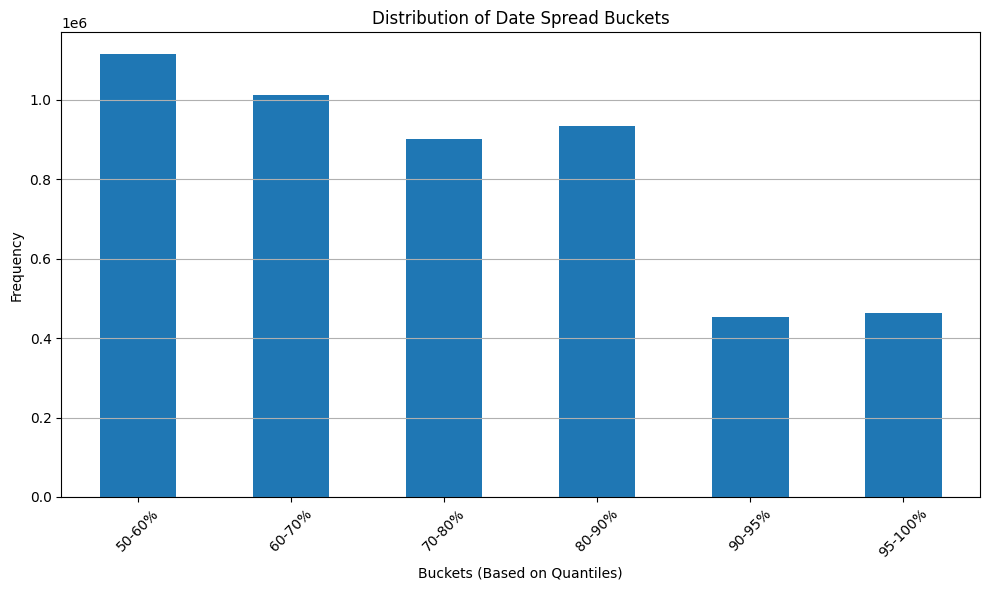

In [45]:
plt.figure(figsize=(10, 6))
bucket_distribution.plot(kind='bar')
plt.title('Distribution of Date Spread Buckets')
plt.xlabel('Buckets (Based on Quantiles)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<ipython-input-46-34906ecbba3d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['spread_bucket'] = pd.cut(df_filtered['date_spread'], bins=edges, include_lowest=True, right=False,


<Figure size 1200x800 with 0 Axes>

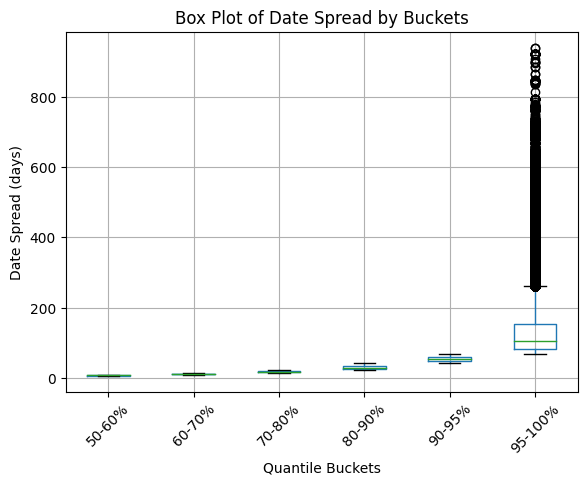

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the quantiles from 50% upwards
quantiles = df_filtered['date_spread'].quantile([0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1.0])

# Define the bucket edges using the quantiles
edges = quantiles.tolist()

# Create a new column for the buckets
df_filtered['spread_bucket'] = pd.cut(df_filtered['date_spread'], bins=edges, include_lowest=True, right=False,
                                      labels=['50-60%', '60-70%', '70-80%', '80-90%', '90-95%', '95-100%'])

# Create a box plot for each bucket
plt.figure(figsize=(12, 8))
df_filtered.boxplot(column='date_spread', by='spread_bucket', grid=True)
plt.title('Box Plot of Date Spread by Buckets')
plt.suptitle('')  # Removes the default subtitle to clean up the plot
plt.xlabel('Quantile Buckets')
plt.ylabel('Date Spread (days)')
plt.xticks(rotation=45)
plt.show()


In [47]:
# Calculate the mean or median date spread for each bucket
bucket_mean_spread = df_filtered.groupby('spread_bucket')['date_spread'].mean()


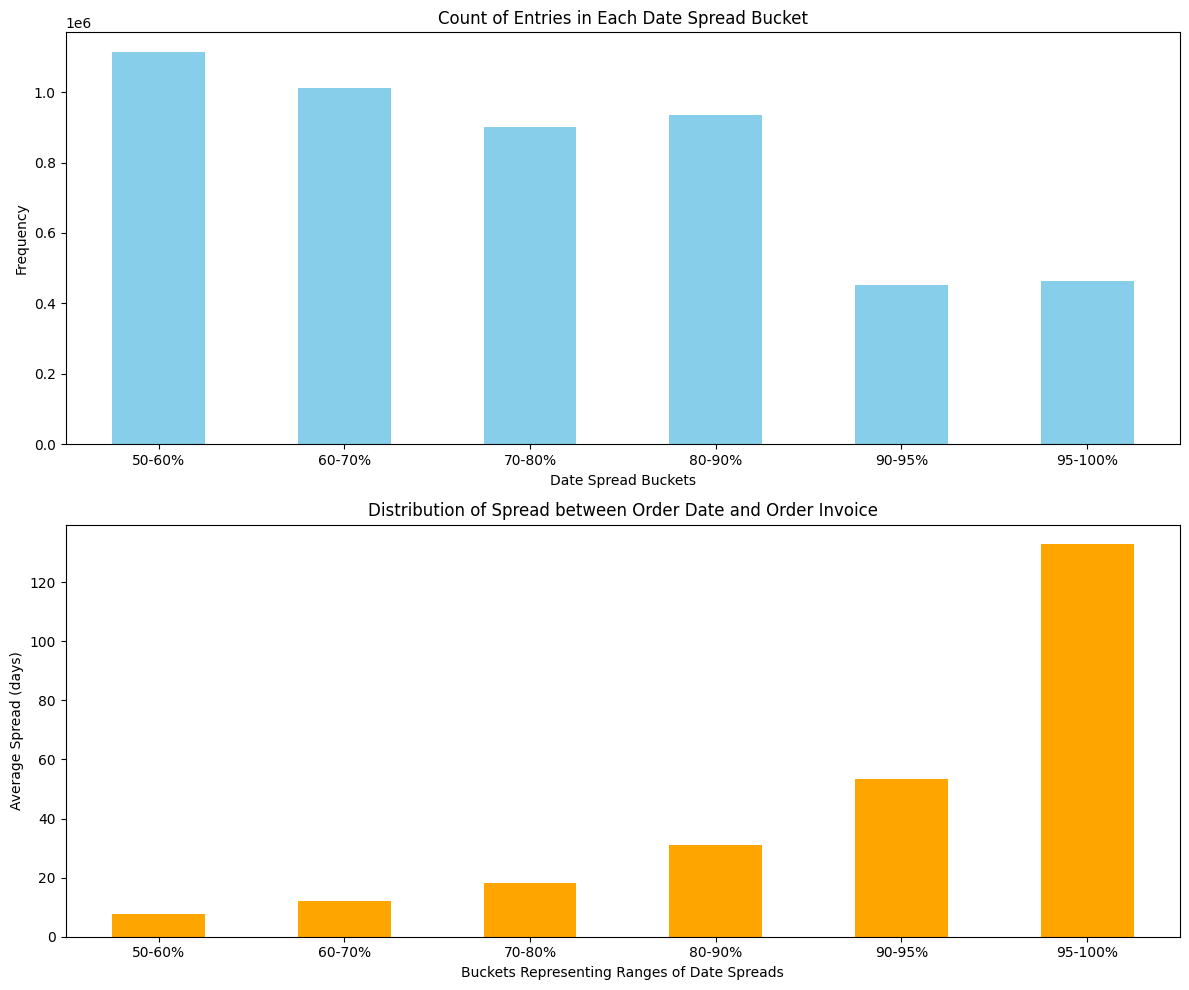

In [48]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))


# Plot for the count of entries in each bucket
df_filtered['spread_bucket'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Count of Entries in Each Date Spread Bucket')
ax[0].set_xlabel('Date Spread Buckets')
ax[0].set_ylabel('Frequency')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0)  # Set x-tick labels to be horizontal

# Plot for the average date spread in each bucket
bucket_mean_spread.plot(kind='bar', ax=ax[1], color='orange')
ax[1].set_title('Distribution of Spread between Order Date and Order Invoice')
ax[1].set_xlabel('Buckets Representing Ranges of Date Spreads')
ax[1].set_ylabel('Average Spread (days)')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0)  # Set x-tick labels to be horizontal

plt.tight_layout()
plt.show()



In [49]:
# Count the number of rows in the original and filtered DataFrames
count_df = len(df)
count_df_filtered = len(df_filtered)

# Calculate the ratio of rows retained after filtering
ratio = count_df_filtered / count_df

print(f"Total rows in original DataFrame: {count_df}")
print(f"Total rows in filtered DataFrame: {count_df_filtered}")
print(f"Ratio of filtered to original: {ratio:.2f}")


Total rows in original DataFrame: 31656061
Total rows in filtered DataFrame: 9157005
Ratio of filtered to original: 0.29


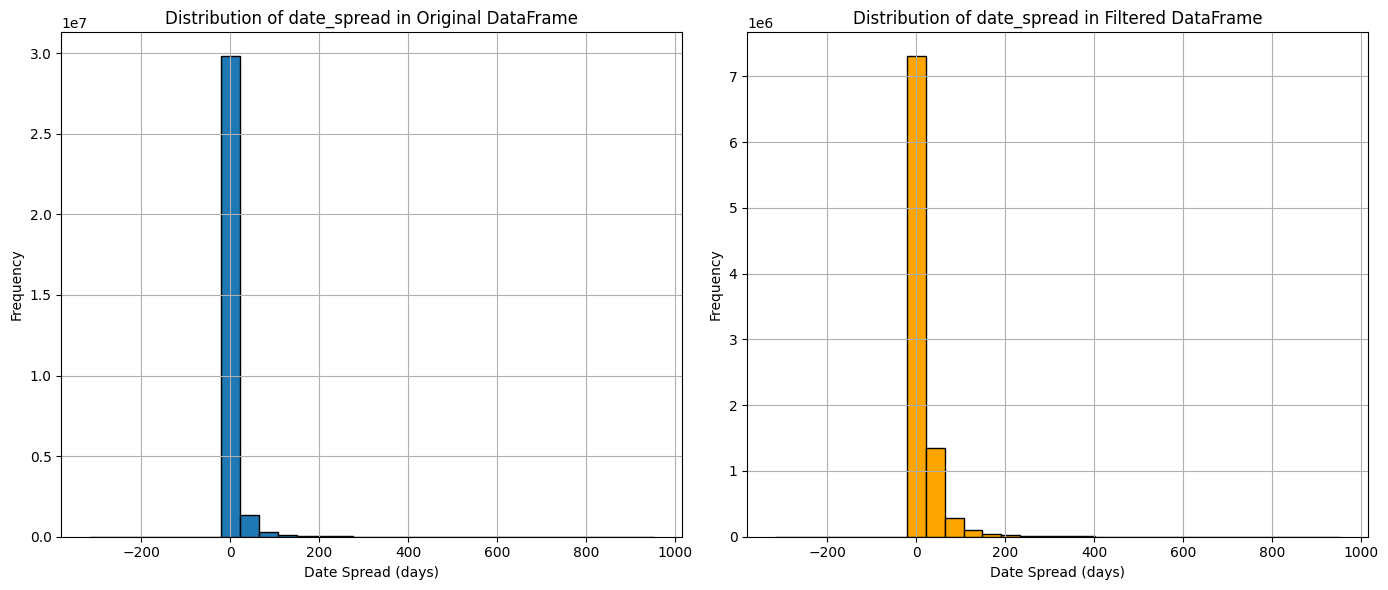

In [50]:
import matplotlib.pyplot as plt

# Setting up the subplot
plt.figure(figsize=(14, 6))

# Histogram for the original DataFrame
plt.subplot(1, 2, 1)
df['date_spread'].hist(bins=30, edgecolor='black')
plt.title('Distribution of date_spread in Original DataFrame')
plt.xlabel('Date Spread (days)')
plt.ylabel('Frequency')

# Histogram for the filtered DataFrame
plt.subplot(1, 2, 2)
df_filtered['date_spread'].hist(bins=30, color='orange', edgecolor='black')
plt.title('Distribution of date_spread in Filtered DataFrame')
plt.xlabel('Date Spread (days)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
